In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
from torchvision import datasets, transforms, models  # datsets  , transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime

In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
transform = transforms.Compose(
    [transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()]
)

<IPython.core.display.Javascript object>

In [5]:
dataset = datasets.ImageFolder("Dataset", transform=transform)

<IPython.core.display.Javascript object>

In [6]:
dataset


Dataset ImageFolder
    Number of datapoints: 61486
    Root location: Dataset
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

<IPython.core.display.Javascript object>

In [78]:
indices = list(range(len(dataset)))


<IPython.core.display.Javascript object>

In [8]:
split = int(np.floor(0.85 * len(dataset)))  # train_size
split

52263

<IPython.core.display.Javascript object>

In [9]:
validation = int(np.floor(0.70 * split))  # validation
validation

36584

<IPython.core.display.Javascript object>

In [10]:
print(0, validation, split, len(dataset))

0 36584 52263 61486


<IPython.core.display.Javascript object>

In [11]:
print(f"length of train size :{validation}")
print(f"length of validation size :{split - validation}")
print(f"length of test size :{len(dataset)-validation}")


length of train size :36584
length of validation size :15679
length of test size :24902


<IPython.core.display.Javascript object>

In [12]:
np.random.shuffle(indices)

<IPython.core.display.Javascript object>

In [13]:
train_indices, validation_indices, test_indices = (
    indices[:validation],
    indices[validation:split],
    indices[split:],
)

<IPython.core.display.Javascript object>

In [14]:
train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)
test_sampler = SubsetRandomSampler(test_indices)

<IPython.core.display.Javascript object>

In [15]:
targets_size = len(dataset.class_to_idx)
targets_size

39

<IPython.core.display.Javascript object>

In [17]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # conv3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # conv4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, K),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 50176)

        # Fully connected
        out = self.dense_layers(out)

        return out

<IPython.core.display.Javascript object>

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


<IPython.core.display.Javascript object>

In [19]:
device = "cpu"

<IPython.core.display.Javascript object>

In [20]:
model = CNN(targets_size)
model

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

<IPython.core.display.Javascript object>

In [21]:
model.to(device)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

<IPython.core.display.Javascript object>

In [22]:
from torchsummary import summary

summary(model, (3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 14, 14]         --
|    └─Conv2d: 2-1                       [-1, 32, 224, 224]        896
|    └─ReLU: 2-2                         [-1, 32, 224, 224]        --
|    └─BatchNorm2d: 2-3                  [-1, 32, 224, 224]        64
|    └─Conv2d: 2-4                       [-1, 32, 224, 224]        9,248
|    └─ReLU: 2-5                         [-1, 32, 224, 224]        --
|    └─BatchNorm2d: 2-6                  [-1, 32, 224, 224]        64
|    └─MaxPool2d: 2-7                    [-1, 32, 112, 112]        --
|    └─Conv2d: 2-8                       [-1, 64, 112, 112]        18,496
|    └─ReLU: 2-9                         [-1, 64, 112, 112]        --
|    └─BatchNorm2d: 2-10                 [-1, 64, 112, 112]        128
|    └─Conv2d: 2-11                      [-1, 64, 112, 112]        36,928
|    └─ReLU: 2-12                        [-1, 64, 112, 112]        --
| 

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 14, 14]         --
|    └─Conv2d: 2-1                       [-1, 32, 224, 224]        896
|    └─ReLU: 2-2                         [-1, 32, 224, 224]        --
|    └─BatchNorm2d: 2-3                  [-1, 32, 224, 224]        64
|    └─Conv2d: 2-4                       [-1, 32, 224, 224]        9,248
|    └─ReLU: 2-5                         [-1, 32, 224, 224]        --
|    └─BatchNorm2d: 2-6                  [-1, 32, 224, 224]        64
|    └─MaxPool2d: 2-7                    [-1, 32, 112, 112]        --
|    └─Conv2d: 2-8                       [-1, 64, 112, 112]        18,496
|    └─ReLU: 2-9                         [-1, 64, 112, 112]        --
|    └─BatchNorm2d: 2-10                 [-1, 64, 112, 112]        128
|    └─Conv2d: 2-11                      [-1, 64, 112, 112]        36,928
|    └─ReLU: 2-12                        [-1, 64, 112, 112]        --
| 

<IPython.core.display.Javascript object>

In [23]:
criterion = nn.CrossEntropyLoss()  # this include softmax + cross entropy loss
optimizer = torch.optim.Adam(model.parameters())

<IPython.core.display.Javascript object>

In [29]:
def batch_gd(model, criterion, train_loader, validation_loader, epochs):
    train_losses = np.zeros(epochs)
    validation_losses = np.zeros(epochs)

    for e in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()

            output = model(inputs)

            loss = criterion(output, targets)

            train_loss.append(loss.item())  # torch to numpy world

            loss.backward()
            optimizer.step()

        train_loss = np.mean(train_loss)

        validation_loss = []

        for inputs, targets in validation_loader:

            inputs, targets = inputs.to(device), targets.to(device)

            output = model(inputs)

            loss = criterion(output, targets)

            validation_loss.append(loss.item())  # torch to numpy world

        validation_loss = np.mean(validation_loss)

        train_losses[e] = train_loss
        validation_losses[e] = validation_loss

        dt = datetime.now() - t0

        print(
            f"Epoch : {e+1}/{epochs} Train_loss:{train_loss:.3f} Test_loss:{validation_loss:.3f} Duration:{dt}"
        )

    return train_losses, validation_losses

<IPython.core.display.Javascript object>

In [30]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler
)
test_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler
)
validation_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=validation_sampler
)

<IPython.core.display.Javascript object>

In [31]:
train_losses, validation_losses = batch_gd(
    model, criterion, train_loader, validation_loader, 5
)


Epoch : 1/5 Train_loss:2.356 Test_loss:1.540 Duration:3:04:18.209353
Epoch : 2/5 Train_loss:1.350 Test_loss:1.187 Duration:2:49:28.855508
Epoch : 3/5 Train_loss:1.069 Test_loss:1.011 Duration:2:42:33.252418
Epoch : 4/5 Train_loss:0.910 Test_loss:0.864 Duration:2:58:01.601071
Epoch : 5/5 Train_loss:0.756 Test_loss:0.847 Duration:2:59:22.336592


<IPython.core.display.Javascript object>

In [32]:
torch.save(model.state_dict(), "plant_disease_model_final.pt")

<IPython.core.display.Javascript object>

In [35]:
targets_size = 39
model = CNN(targets_size)
model.load_state_dict(torch.load("plant_disease_model_final.pt"))
model.eval()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

<IPython.core.display.Javascript object>

In [76]:
%matplotlib notebook

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


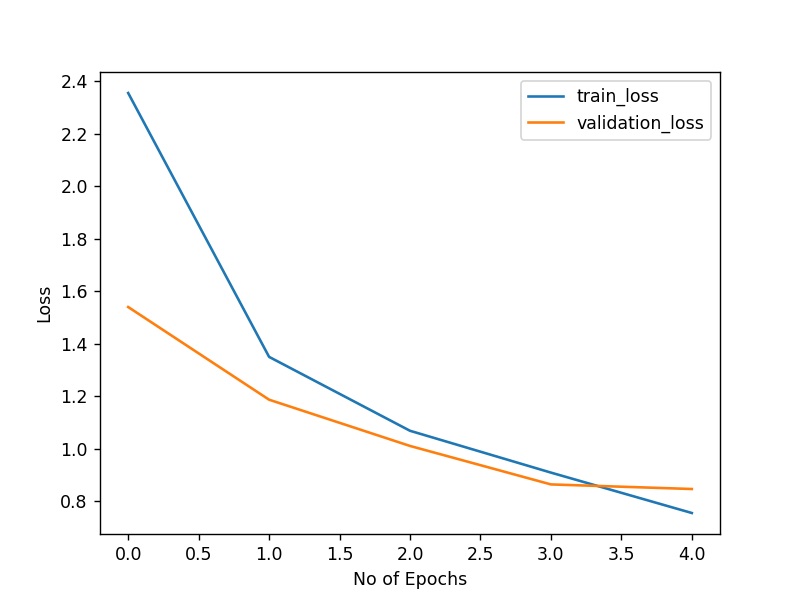

<IPython.core.display.Javascript object>

In [77]:
plt.plot(train_losses, label="train_loss")
plt.plot(validation_losses, label="validation_loss")
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [39]:
def accuracy(loader):
    n_correct = 0
    n_total = 0

    for inputs, targets in loader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)

        _, predictions = torch.max(outputs, 1)

        n_correct += (predictions == targets).sum().item()
        n_total += targets.shape[0]

    acc = n_correct / n_total
    return acc

<IPython.core.display.Javascript object>

In [40]:
train_acc = accuracy(train_loader)
test_acc = accuracy(test_loader)
validation_acc = accuracy(validation_loader)

<IPython.core.display.Javascript object>

In [41]:
print(
    f"Train Accuracy : {train_acc}\nTest Accuracy : {test_acc}\nValidation Accuracy : {validation_acc}"
)

Train Accuracy : 0.8853870544500329
Test Accuracy : 0.8574216632332213
Validation Accuracy : 0.8580904394412909


<IPython.core.display.Javascript object>

In [42]:
transform_index_to_disease = dataset.class_to_idx

<IPython.core.display.Javascript object>

In [43]:
transform_index_to_disease = dict(
    [(value, key) for key, value in transform_index_to_disease.items()]
)

<IPython.core.display.Javascript object>

In [44]:
data = pd.read_csv(
    r"C:\Users\J POORNA CHANDER\Downloads\Plant-Disease-Detection-main\Plant-Disease-Detection-main\Flask Deployed App\disease_info.csv",
    encoding="cp1252",
)

<IPython.core.display.Javascript object>

In [45]:
from PIL import Image
import torchvision.transforms.functional as TF

<IPython.core.display.Javascript object>

In [46]:
def single_prediction(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    input_data = TF.to_tensor(image)
    input_data = input_data.view((-1, 3, 224, 224))
    output = model(input_data)
    output = output.detach().numpy()
    index = np.argmax(output)
    print("Original : ", image_path[12:-4])
    pred_csv = data["disease_name"][index]
    print(pred_csv)

<IPython.core.display.Javascript object>

In [50]:
single_prediction(
    "C:\\Users\\J POORNA CHANDER\\Downloads\\Plant-Disease-Detection-main\\Plant-Disease-Detection-main\\test_images\\tomato_septoria_leaf_spot.JPG"
)


Original :  OORNA CHANDER\Downloads\Plant-Disease-Detection-main\Plant-Disease-Detection-main\test_images\tomato_septoria_leaf_spot
Tomato : Septoria Leaf Spot


<IPython.core.display.Javascript object>

In [52]:
single_prediction(
    "C:\\Users\\J POORNA CHANDER\\Downloads\\Plant-Disease-Detection-main\\Plant-Disease-Detection-main\\test_images\\apple_healthy.JPG"
)


Original :  OORNA CHANDER\Downloads\Plant-Disease-Detection-main\Plant-Disease-Detection-main\test_images\apple_healthy
Apple : Healthy


<IPython.core.display.Javascript object>

In [54]:
single_prediction(
    "C:\\Users\\J POORNA CHANDER\\Downloads\\Plant-Disease-Detection-main\\Plant-Disease-Detection-main\\test_images\\cherry_healthy.JPG"
)

Original :  OORNA CHANDER\Downloads\Plant-Disease-Detection-main\Plant-Disease-Detection-main\test_images\cherry_healthy
Cherry : Healthy


<IPython.core.display.Javascript object>

In [55]:
single_prediction(
    "C:\\Users\\J POORNA CHANDER\\Downloads\\Plant-Disease-Detection-main\\Plant-Disease-Detection-main\\test_images\\cherry_powdery_mildew.JPG"
)

Original :  OORNA CHANDER\Downloads\Plant-Disease-Detection-main\Plant-Disease-Detection-main\test_images\cherry_powdery_mildew
Cherry : Powdery Mildew


<IPython.core.display.Javascript object>